In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import sys

from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.manifold import Isomap, MDS

In [3]:
%run data_loader.ipynb

corpus = [
    headline for headline in df["headline"]
    if not pd.isnull(headline)
]

In [4]:
# ===============
# CountVectorizer

vectorizer = CountVectorizer()
X = vectorizer.fit_transform(corpus)

# ===============
# TfidfVectorizer

vectorizer = TfidfVectorizer()
X_tfidf = vectorizer.fit_transform(corpus)

# ============================================
# CountVectorizer with Tfidf feature selection

tfidf_scores = X_tfidf.sum(axis=0).tolist()[0]
feature_names = vectorizer.get_feature_names()

pairs = list(zip(feature_names, tfidf_scores))
pairs.sort(key=lambda x: x[1], reverse=True)

stop_words = set(stopwords.words("english"))
vocabulary = [
    feature_name for feature_name, tfidf_score in pairs
    if feature_name not in stop_words
]

def select(num_features):
    vocabulary_selected = vocabulary[:num_features]
    
    vectorizer = CountVectorizer(vocabulary=vocabulary)
    return vectorizer.fit_transform(corpus)

X_selected = select(10)

Text(0.5,1,'headline')

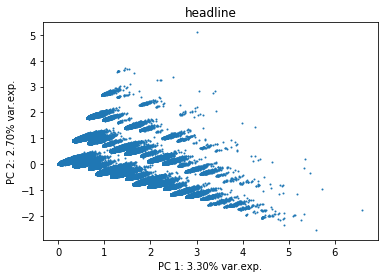

In [11]:
pca = TruncatedSVD(n_components=2)
Z = pca.fit_transform(X)
variances = pca.explained_variance_ratio_

plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
plt.ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
plt.title("headline")

Text(0.5,0.92,'headline')

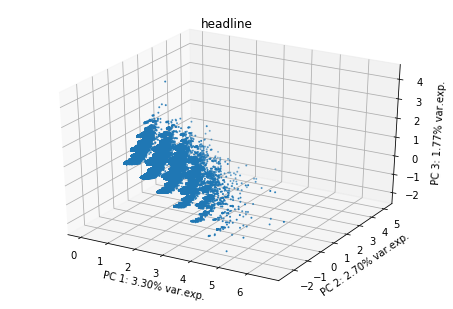

In [12]:
pca = TruncatedSVD(n_components=3)
Z = pca.fit_transform(X)
variances = pca.explained_variance_ratio_

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=1)
ax.set_xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
ax.set_ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
ax.set_zlabel("PC 3: " + "{:.2%}".format(variances[2]) + " var.exp.")
plt.title("headline")

Text(0.5,1,'headline (TF-IDF features)')

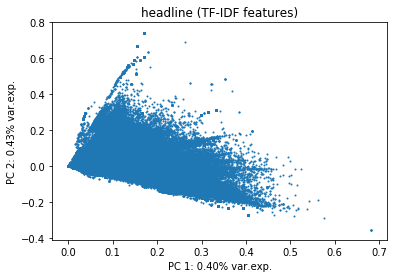

In [31]:
pca = TruncatedSVD(n_components=2)
Z = pca.fit_transform(X_tfidf)
variances = pca.explained_variance_ratio_

plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
plt.ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
plt.title("headline (TF-IDF features)")

Text(0.5,0.92,'headline (TF-IDF features)')

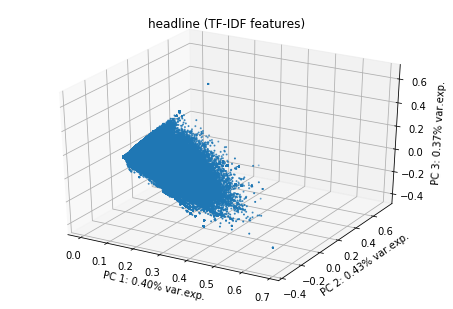

In [32]:
pca = TruncatedSVD(n_components=3)
Z = pca.fit_transform(X_tfidf)
variances = pca.explained_variance_ratio_

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=1)
ax.set_xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
ax.set_ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
ax.set_zlabel("PC 3: " + "{:.2%}".format(variances[2]) + " var.exp.")
plt.title("headline (TF-IDF features)")

Text(0.5,1,'headline (300 features)')

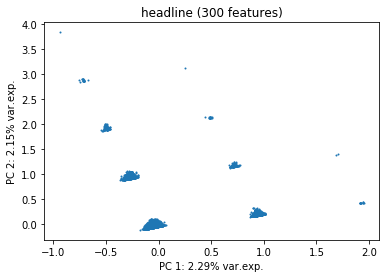

In [41]:
X_selected = select(300)

pca = PCA(n_components=2)
Z = pca.fit_transform(X_selected.toarray())
variances = pca.explained_variance_ratio_

plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
plt.ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
plt.title("headline (300 features)")

Text(0.5,0.92,'headline (300 features)')

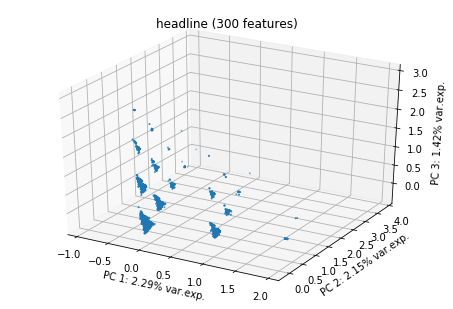

In [42]:
pca = PCA(n_components=3)
Z = pca.fit_transform(X_selected.toarray())
variances = pca.explained_variance_ratio_

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=1)
ax.set_xlabel("PC 1: " + "{:.2%}".format(variances[0]) + " var.exp.")
ax.set_ylabel("PC 2: " + "{:.2%}".format(variances[1]) + " var.exp.")
ax.set_zlabel("PC 3: " + "{:.2%}".format(variances[2]) + " var.exp.")
plt.title("headline (300 features)")

In [ ]:
isomap = Isomap(n_neighbors=5, n_components=2, n_jobs=-1)
Z = isomap.fit_transform(X_selected.toarray())

plt.scatter(Z[:, 0], Z[:, 1], s=1)
plt.xlabel("Dimension 1")
plt.ylabel("Dimension 2")
plt.title("headline (ISOMAP, 300 features)")

In [ ]:
isomap = Isomap(n_components=3, n_jobs=-1)
Z = isomap.fit_transform(X)

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter(Z[:, 0], Z[:, 1], Z[:, 2], s=1)
plt.title("headline (ISOMAP, n_components=3)")